# Capstone Project

Question 1: Are the (roughly) continuous variables within the total data normally distributed? If not, are they normally distributed within disease state? 

Making a scatter matrix of the continuous variables should answer these questions.

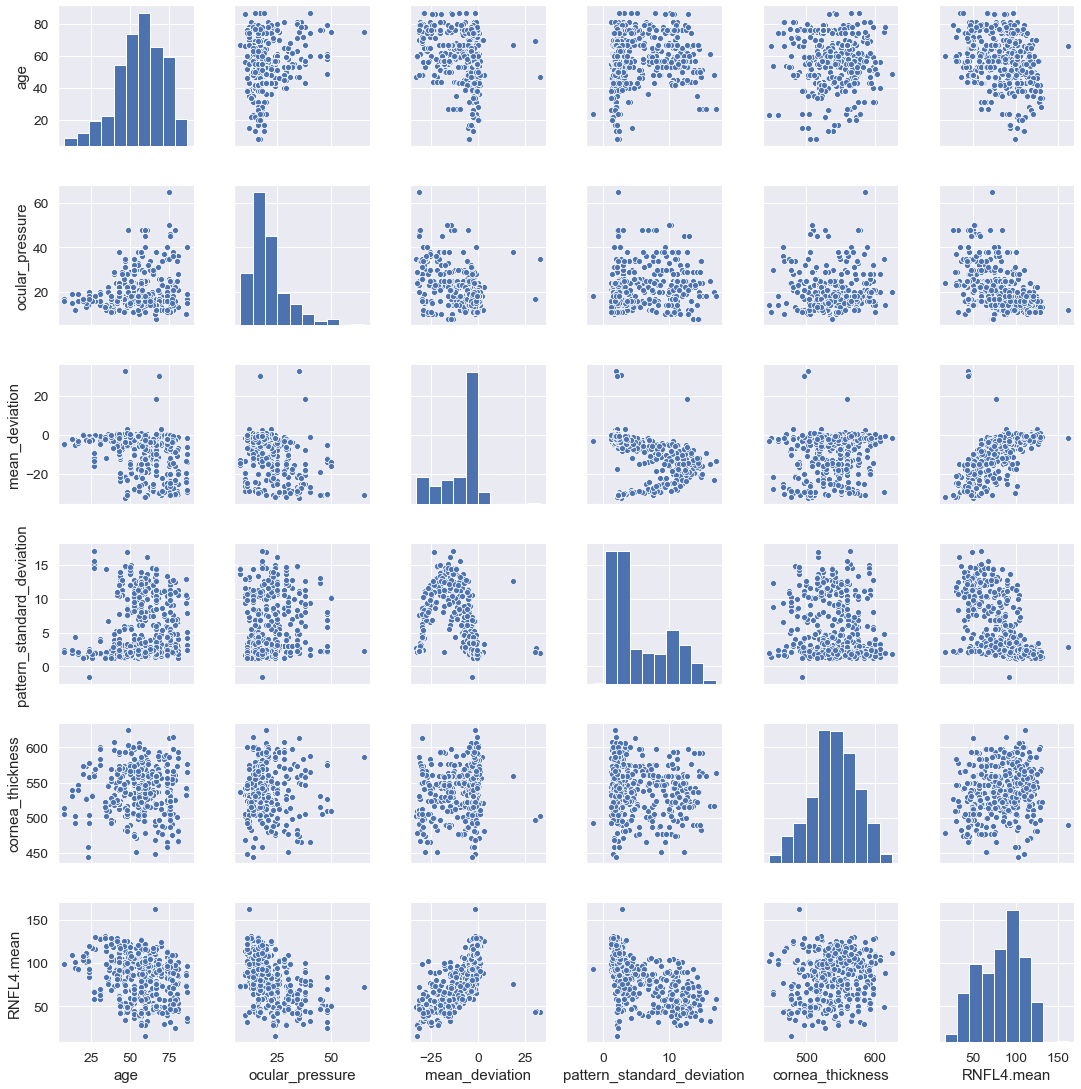

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas
import seaborn as sns

whole_dataset = 'data/ds_whole.csv'
df = pd.read_csv(whole_dataset)
#read in the whole dataset

df_cont = df[['age', 'ocular_pressure', 'mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
#subset into the (roughly) continuous variables only

sns.pairplot(df_cont)
#plot the scatter matrix of the continuous variables. I used seaborn because I like the default look of it better.
sns.set(font_scale = 1.25)
#I increased the font size a bit to be more readable


Based on the scatter matrix above, age, ocular pressure, cornea thickness, and to some extent RNFL4.mean seems to be roughly normally distibuted by eye, although age and ocular pressure seems to have a bit of skew.

Both deviation variables do not seem to be normally distiributed, and are instead hace some values that are vastly overrepresented compared to the rest. I'll split up these data into disease vs. healthy and repeat the scatter matrix plotting to see if those look better.


In [3]:
#A value of 1 in the glaucoma series indicates presence of the disease while 0 indicates absence.
df_disease =  df[ df['glaucoma'] == 1 ]
df_healthy = df[ df['glaucoma'] == 0 ]
#Subset data into healthy vs. disease
df_healthy_cont = df_healthy[['age', 'ocular_pressure','mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
df_disease_cont = df_disease[['age', 'ocular_pressure','mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
#Subset just the continuous variables again


Disease scatter matrix:

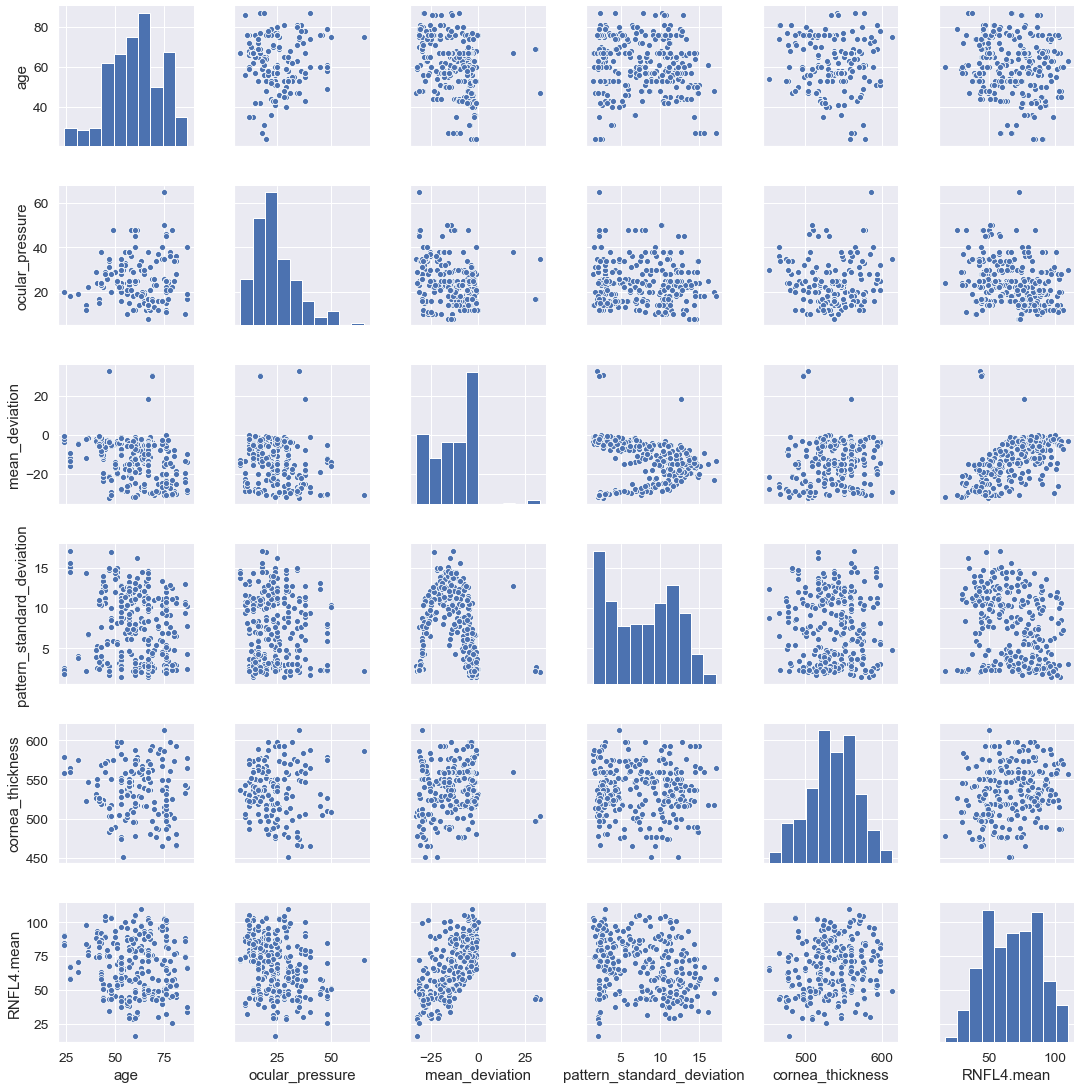

In [4]:
 sns.pairplot(df_disease_cont)

Healthy scatter matrix:

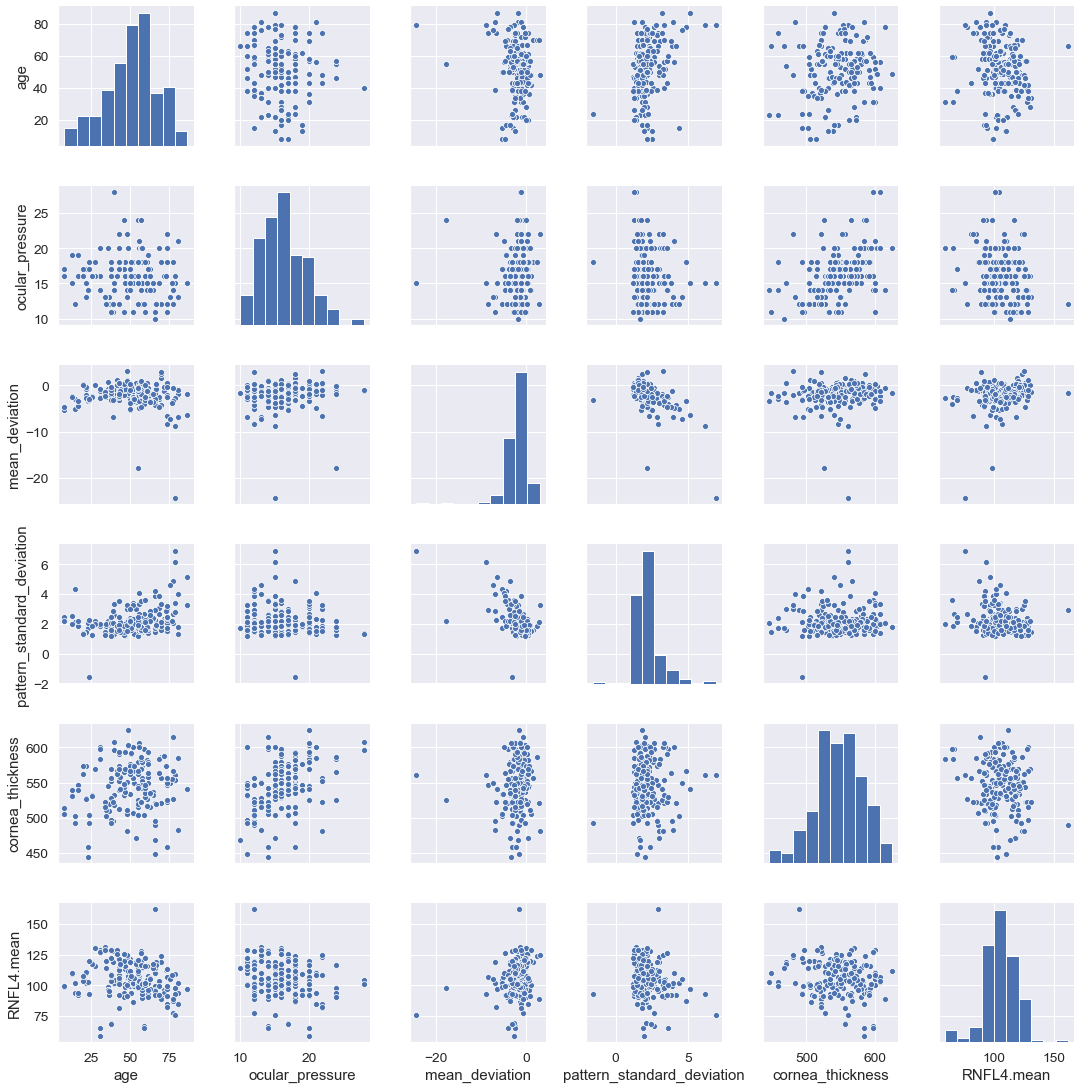

In [5]:
 sns.pairplot(df_healthy_cont)

After splitting into disease vs non-disease states, it seems that age, cornea thickness, and RNFL4.mean maintain their roughly normal distributions. Interestingly, splitting this up reveals that the distributions of both the mean_deviation and pattern_standard_deviation variables are generally much narrower in the healthy samples as compared to the disease samples. 

2) After PCA, how many dimensions are necessary to account for at least 95% of the variance within the data?

In [7]:
from sklearn.decomposition import PCA # sklearn == scikit-learn package name
import pandas as pd # pandas
import numpy as np
from sklearn.preprocessing import StandardScaler

#read in the data
whole_dataset = 'data/ds_whole.csv'
df = pd.read_csv(whole_dataset)

#subset to (roughly) continuous variables
#Note that this is necessary to perform PCA as an assumption of PCA is that the data are continuous
df_cont = df[['age', 'ocular_pressure', 'mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]

#standardize the data to be appropriate for PCA
scaler = StandardScaler()
scaler.fit(df_cont)
df_cont_scaled = scaler.transform(df_cont)

#Do PCA
pca = PCA(n_components=6)
pca.fit(df_cont_scaled)

PCA(n_components=6)

In [8]:
#copy-pasted from lecture10/11...
print('The fraction of the total variance explained by each component is:', pca.explained_variance_ratio_)
print('The total explained variance is :', np.sum(pca.explained_variance_ratio_))

The fraction of the total variance explained by each component is: [0.4487323  0.16634712 0.15110719 0.11964642 0.06373315 0.05043382]
The total explained variance is : 1.0


Based on the explained total variance function above, all 6 components are necessary to account for at least 95% of the variance. This is consistent with the middling correlation coefficients observed in question 3 (see Rmd file); I would have expected higher correlation coefficients for there to be less components necessary to explain the variance in the data.